In [1]:
import easyocr
import sys
reader = easyocr.Reader(['en'])
sys.path.append('/home/jessica/reading-kiln-termostat/src')
from pathlib import Path

import cv2 
import os
import pathlib
import matplotlib.pyplot as plt 
import numpy as np
import InputReader
import PreProcesser
import CurveCreator

input_reader = InputReader.InputReader()
prep = PreProcesser.PreProcesser()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/alta_temperatura/29-08-2023-esmalte'
save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'
first_number = 1110

curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1158, [515, 595, 820, 1030])
curve_creator.create_curve()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


1158
1159
1158
1161
1852
1163
1165
1166
1167
1168
1138
1838
list index out of range


UnboundLocalError: local variable 'predicted_number' referenced before assignment

In [3]:
red1 = '/home/jessica/Pictures/Screenshots/1085_redtest.png'
red2 = '/home/jessica/Pictures/Screenshots/1131_redtest.png'
grey1 = '/home/jessica/reading-kiln-termostat/data/frames/crop_test/2023-09-04_18: 10: 41_1113.png'
grey2 = '/home/jessica/reading-kiln-termostat/data/frames/crop_test/2023-09-04_18: 08: 41_1171.png'
greywhole = '/home/jessica/reading-kiln-termostat/data/frames/04-09-2023/16_0.png'
red_test = '/home/jessica/reading-kiln-termostat/data/processed_recordings/29-08-2023-esmalte/prediction_frames/2023-08-29_16:44:44_1158.png'

In [49]:
def white_mask(image):
    lower_white = np.array([242, 242, 242], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_white, upper_white)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

def red_mask(image):
    lower_red = np.array([110, 110, 240], dtype=np.uint8)
    upper_red = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_red, upper_red)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

In [50]:
prep.is_gray(cv2.imread(greywhole))

True

In [53]:
image = cv2.imread(red1)
img = red_mask(image)
reader.readtext(img, allowlist='0123456789')

# plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')


[([[11, 11], [119, 11], [119, 53], [11, 53]], '1085', 0.7468449473381042)]

[([[62, 0], [190, 0], [190, 52], [62, 52]], '1113', 0.6099976897239685)]

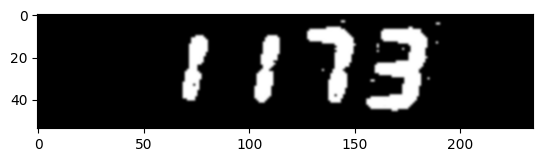

In [36]:
#Para branco
# path = '/home/jessica/reading-kiln-termostat/data/frames/crop_test/2023-09-04_18: 32:41_1192.png'
image = cv2.imread(grey1)

# Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
lower_white = np.array([240, 240, 240], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask to filter out white pixels
mask = cv2.inRange(image, lower_white, upper_white)

# Optionally, apply the mask to the original image to extract only white areas
white_pixels = cv2.bitwise_and(image, image, mask=mask)
ocr = reader.readtext(white_pixels, allowlist='0123456789')
plt.imshow(white_pixels, cmap = 'gray', interpolation = 'bicubic')

ocr

[([[11, 9], [119, 9], [119, 53], [11, 53]], '1085', 0.9531593322753906)]

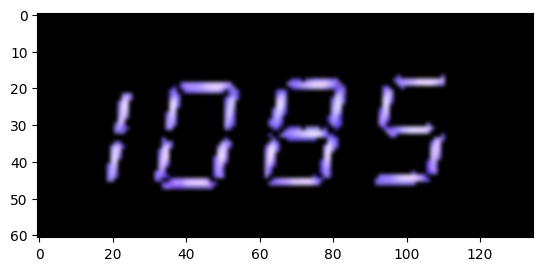

In [122]:
image = cv2.imread(red1)

# Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
lower_white = np.array([50, 50, 210], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask to filter out white pixels
mask = cv2.inRange(image, lower_white, upper_white)

# Optionally, apply the mask to the original image to extract only white areas
white_pixels = cv2.bitwise_and(image, image, mask=mask)
ocr = reader.readtext(white_pixels, allowlist='0123456789')
plt.imshow(white_pixels, cmap = 'gray', interpolation = 'bicubic')

ocr

[([[9, 8], [120, 8], [120, 57], [9, 57]], '1085', 0.9951554536819458)]

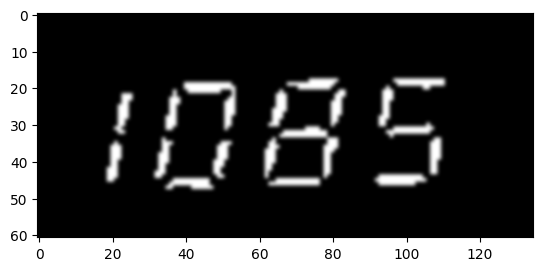

In [20]:
import numpy as np
#Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
img = cv2.imread(red1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
_, threshold_image = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)

plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')
ocr = reader.readtext(threshold_image, allowlist='0123456789')
ocr

'1068'

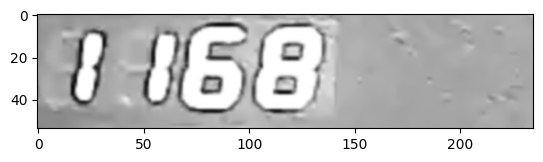

In [89]:
img = cv2.imread(test_image)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
roi = img[770:824, 1100:1335]
plt.imshow(roi, cmap = 'gray', interpolation = 'bicubic')
ocr_results = reader.readtext(roi)
ocr_results[0][1].replace(" ", "")

In [4]:
def white_mask(image):
    lower_white = np.array([242, 242, 242], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_white, upper_white)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

def red_mask(image):
    lower_red = np.array([50, 50, 210], dtype=np.uint8)
    upper_red = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_red, upper_red)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

In [48]:
x = [770:824, 1050:1285]


SyntaxError: invalid syntax (1503658008.py, line 1)

In [ ]:
DATA_PATH = '/home/jessica/reading-kiln-termostat/data/gisela'
directories = [d for d in DATA_PATH if d.is_dir()]
for firing in directories:
    curve_creator = CurveCreator.CurveCreator()

In [5]:
firing_save_path = '/home/jessica/reading-kiln-termostat/data/first/' + pathlib.Path(dir_path).name 
firing_save_path + "curve_predictions.csv"

'/home/jessica/reading-kiln-termostat/data/first/29-08-2023-esmaltecurve_predictions.csv'

In [4]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/alta_temperatura/29-08-2023-esmalte'
first_path = '/home/jessica/reading-kiln-termostat/data/first/'
if not os.path.exists(first_path):
    os.makedirs(first_path)
input_reader.frame_recorded_firing(dir_path, first_path)


KeyboardInterrupt: 

In [ ]:
img = cv2.imread('/home/jessica/reading-kiln-termostat/data/first/0_0.png')
reader.readtext(img)

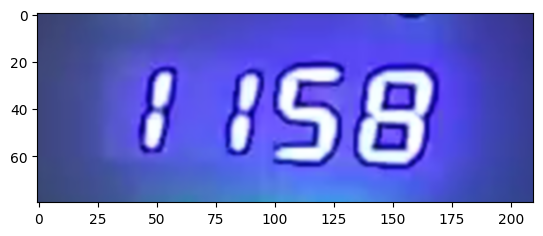

In [26]:
cropped = img[515: 595, 820:1030]
#[857, 529], [995, 529], [995, 589], [857, 589]
plt.imshow(cropped, cmap = 'gray', interpolation = 'bicubic')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


NameError: name 'input_reader' is not defined

In [24]:
png_compression_level = 0
dir_path = '/home/jessica/reading-kiln-termostat/data/frames/04-09-2023'
p = sorted(pathlib.Path(dir_path).glob('**/*'), key=os.path.getmtime)
save_path = '/home/jessica/reading-kiln-termostat/data/frames/crop_test/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
files = [str(f) for f in p if f.is_file()]
files
index = files.index('/home/jessica/reading-kiln-termostat/data/frames/04-09-2023/14_240.png')
for f in files[index:]:
    crop = cv2.imread(f)
    datetime_results = reader.readtext(f)
    texts = list(map(list, zip(*datetime_results)))[1]
    date = [text for text in texts if '-' in text][0]
    time = [text for text in texts if ':' in text][0]
    
    crop = cv2.imread(f)[770:824, 1050:1285]
    predicted_number = reader.readtext(white_mask(crop), allowlist='0123456789', paragraph = True)[0][1].replace(" ", "") 
    
    file_name = save_path + date + '_' + time + '_' + predicted_number + '.png'

    r = cv2.imwrite(file_name, crop), [int(cv2.IMWRITE_PNG_COMPRESSION), png_compression_level]

KeyboardInterrupt: 

In [53]:
p = sorted(pathlib.Path(dir_path).glob('**/*'), key=os.path.getmtime)
files = [str(f) for f in p if f.is_file()]
signal = []
for f in files:
    pattern = r"([^_]+)"
    matches = re.findall(pattern, filename)
    date = matches[0]
    time = matches[1]
    temp = int(matches[2])

In [36]:
ocr_results = reader.readtext(test_image)
for (bbox, text, prob) in ocr_results:
    print(f'Text: {text}, Probability: {prob}')

Text: 2023-09-04, Probability: 0.9985811675993548
Text: 18: 05: 41, Probability: 0.5279606141063766
Text: 068, Probability: 0.45150694481688547
Text: 836, Probability: 0.8444361164315615
Text: STEcvo, Probability: 0.4298625581323543
Text: SS, Probability: 0.9511372110453015
